In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import os

In [3]:
lmax = 2000
Tcmb  = 2.726e6    # CMB temperature in microkelvin?
rlmin, rlmax = 2, 2000 # CMB multipole range for reconstruction
nside = 2048
bstype = 'equi'
nsims = 448 # Number of simulations to average over (in sets of 3) 
ellmin = 2 
ellmax = 2000 ##### check!!!! vs sims
ls, cl_unl, cl_len, cl_phi = np.loadtxt('/home/amb257/kappa_bispec/make_sims_parallel/camb_lencl_phi.txt')
L_lots = np.arange(rlmax+1)
Lfac = (L_lots*(L_lots+1.) / 2 )**2
lcl = cl_len[0:rlmax+1] / Tcmb**2
print('lcl not interp', lcl[lmax])
ucl = cl_unl[0:rlmax+1] / Tcmb**2 #dimless unlensed T Cl
cl_kappa = Lfac * cl_phi[0:rlmax+1]
l_bins = np.arange(0,100,10)
cl_where = cl_kappa[l_bins]
print(cl_where)

lcl not interp 4.6554353095210565e-17
[0.00000000e+00 1.66870490e-07 2.06031272e-07 2.17543630e-07
 2.17004910e-07 2.10657754e-07 2.01537811e-07 1.91161657e-07
 1.80472047e-07 1.69897924e-07]


(1, 200)

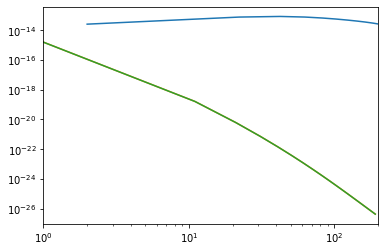

In [15]:
LensingL, testquad = np.loadtxt('TEST_quad_equi.txt')
LensingL, testdirect = np.loadtxt('TEST_direct_equi.txt')

# import giorgio results
L_analytic, N2_6pt = np.loadtxt("/home/amb257/kappa_bispec/optimal_est/Plots/data/data_for_paper/numerical_N2/Giorgio_equi_N2_analytic.txt")
plt.loglog(L_analytic, N2_6pt)
plt.loglog(LensingL, testquad)
plt.loglog(LensingL, testdirect)
plt.xlim(1,200)

[1.11360909e-13 1.06296307e-18 2.08598155e-20 1.65211123e-21
 2.54319114e-22 5.41831337e-23 1.50078927e-23 4.88285305e-24
 1.80428166e-24 7.50944152e-25 3.41814737e-25 1.61454078e-25
 8.29476714e-26 4.42332214e-26 2.48735063e-26 1.39895599e-26
 8.52467345e-27 5.24788951e-27 3.31782088e-27 2.11919002e-27]


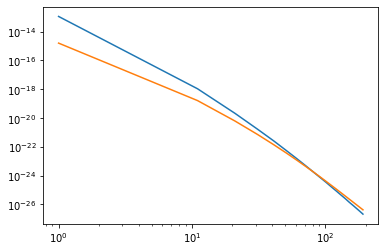

In [16]:
input_dir = "vegas_results"
L = np.load(os.path.join(input_dir, "L.npy"))
vegas_lowL = np.load(os.path.join(input_dir, "VEGAS_lowL.npy"))
plt.loglog(L, vegas_lowL)
plt.loglog(LensingL, testquad)
print(vegas_lowL)

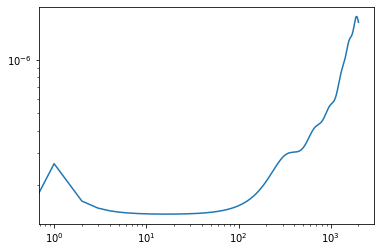

In [ ]:
L_norm, norm_phi = np.loadtxt('norm_phi.txt')
Lfac_norm = (L_norm*(L_norm+1.))**2/(2*np.pi)
plt.loglog(L_norm, Lfac_norm*norm_phi)
#This looks legit.

Text(0, 0.5, 'N2')

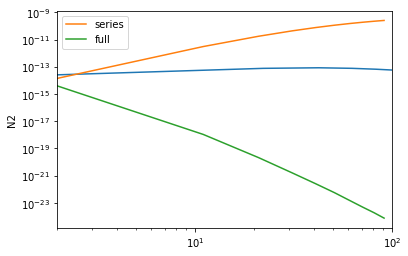

In [12]:
L, out = np.loadtxt('SERIES_lowLN2_out.txt')
L, full_int_out = np.loadtxt('lowLN2_out.txt')
plt.loglog(L_analytic, N2_6pt)
plt.loglog(L, out, label = 'series')
plt.plot(L, full_int_out, label = 'full')
plt.xlim(2,100)
#plt.ylim(1e-13,1e-8)
plt.legend()
plt.ylabel('N2')
#plt.yscale('log')

[-8.27360357e-15 -3.59263020e-16 -1.05522874e-15 ... -1.18368704e-14
 -1.39742755e-14 -1.47027124e-14]
6.338676424888803e-11


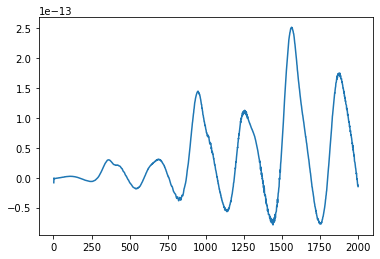

In [ ]:
L, int = np.loadtxt('series_integrand.txt')
plt.plot(L, int)
print(int)
print(np.sum(int))

3.535829630954276e-09
3.536470461416592e-09


(500.0, 800.0)

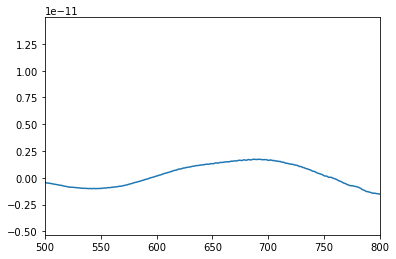

In [ ]:
# Load in the integrand used for the direct sum calculation
ell, integrand = np.loadtxt('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/integrand_direct_sum_10.0.txt')
plt.plot(ell, integrand)
print(np.sum(integrand))
integral = np.trapz(integrand, ell)
print(integral)
plt.xlim(500,800)

[1.56321681e-15 1.60333667e-19 6.09755949e-21 7.09855641e-22
 1.38296286e-22 3.64244155e-23 1.17280061e-23 4.36190330e-24
 1.81118682e-24 8.20302387e-25]


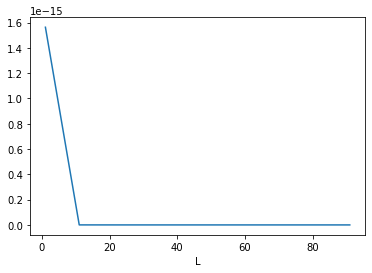

In [ ]:
L, direct_int = np.loadtxt('new_direct_sum_integeral.txt')
#L, direct_int = np.loadtxt('integral_direct_sum_10.0.txt')
plt.plot(L, direct_int)
plt.xlabel('L')
print(direct_int)

(20, 1000)

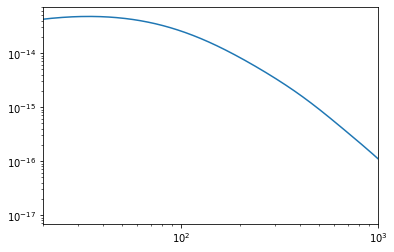

In [ ]:
plt.loglog(L_lots, cl_kappa**2)
plt.xlim(20,1000)

/home/amb257/.conda/envs/cmplx_fld_lensplus/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/home/amb257/.conda/envs/cmplx_fld_lensplus/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


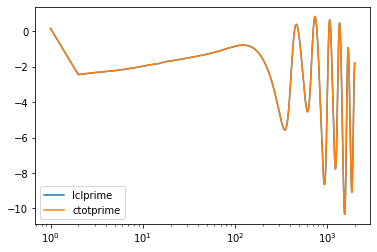

In [ ]:
L, ctotprime = np.loadtxt('ctotprime.txt')
L, lclprime = np.loadtxt('lclprime.txt')
L, lcldoubleprime = np.loadtxt('lcldoubleprime.txt')
L, lcl = np.loadtxt('lcl.txt')
L, ocl = np.loadtxt('ocl.txt')
plt.plot(L, L* lclprime / lcl, label='lclprime')
plt.plot(L, L* ctotprime / lcl, label = 'ctotprime')
plt.xscale('log')
plt.legend()

/home/amb257/.conda/envs/cmplx_fld_lensplus/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


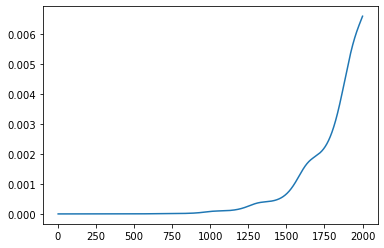

In [ ]:
plt.plot(L, L* ctotprime / lcl - L* lclprime / lcl)

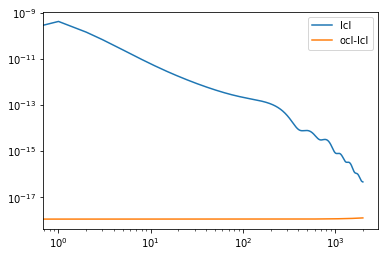

In [ ]:
plt.loglog(L, lcl, label = 'lcl')
plt.loglog(L, ocl-lcl, label = 'ocl-lcl')
plt.legend()

In [ ]:
print(lcl[0:2])
print(ocl[0:2])

[0.00000000e+00 4.19210004e-10]
[1.13867696e-18 4.19210005e-10]


/home/amb257/.conda/envs/cmplx_fld_lensplus/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


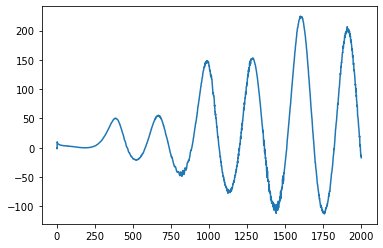

In [ ]:
plt.plot(L, L**2 / lcl * lcldoubleprime)

In [ ]:
import numpy as np
from numpy import random 
from scipy.integrate import quad
# Define a random integrand
def integrand_fn(ell):
    integrand = 1e-11*np.cos(ell / 100) * np.sin(ell / 300) + random.rand()*1e-12
    return integrand

# Set integration limits
ellmin = 2
ellmax = 100

integrand_values = []
for ell in np.arange(ellmin, ellmax + 1):
    integrand = integrand_fn(ell)
    integrand_values.append(integrand)

# Now write some code to integrate this using quad
integral_quad, error = quad(integrand_fn, ellmin, ellmax, limit=1000)

# Now compute the same integrand using direct summation
integral_direct_sum = np.sum(integrand_values)

print('quad', integral_quad)
print('direct sum', integral_direct_sum)

quad 1.730129023914413e-10
direct sum 1.6785486540091193e-10


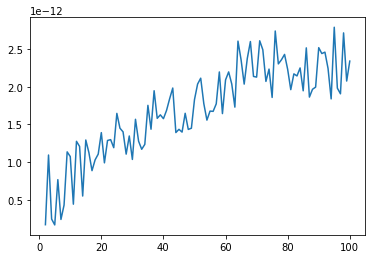

In [ ]:
ell = np.arange(ellmin, ellmax + 1)
plt.plot(ell, integrand_values)
